In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Data/df_rwc_1946.csv',index_col=0)
df

,Year,Team 1,Team 1 rank,Team 1 Score,Team 2,Team 2 rank,Team 2 Score,Result,country,world_cup
0,1946,New Zealand,2.0,31,Australia,7.0,8,New Zealand,New Zealand,False
1,1946,New Zealand,2.0,14,Australia,7.0,10,New Zealand,New Zealand,False
16,1947,Wales,3.0,6,Australia,5.0,0,Wales,Wales,False
15,1947,Ireland,6.0,3,Australia,5.0,16,Ireland,Ireland,False
14,1947,Scotland,8.0,7,Australia,7.0,16,Scotland,Scotland,False
...,...,...,...,...,...,...,...,...,...,...
2231,2023,Italy,12.0,24,France,2.0,29,Italy,Italy,False
2230,2023,England,6.0,23,Scotland,5.0,29,England,England,False
2229,2023,Wales,9.0,10,Ireland,1.0,34,Wales,Wales,False
2244,2023,South Africa,4.0,43,Australia,7.0,12,South Africa,South Africa,False


In [2]:
rw_rank=pd.read_csv('Data/world_rugby_rankings.csv',index_col=0)
rw_rank

,Date,New Zealand,Australia,South Africa,France,England,Ireland,Wales,Scotland,Italy,...,Namibia,Russia,Spain,Poland,Chile,Hong Kong,Brazil,Belgium,Netherlands,Switzerland
0,2003-10-06,2,4,6,5,1,3,10,9,13,...,25,23,30,32,24,28,35,53,40,38
1,2003-10-13,2,3,6,5,1,4,8,10,13,...,25,23,30,32,24,28,34,54,41,40
2,2003-10-20,2,3,6,5,1,4,8,10,12,...,25,23,30,32,24,28,34,53,40,39
3,2003-10-27,2,4,6,5,1,3,8,10,12,...,25,23,30,33,24,28,34,53,40,37
4,2003-11-03,2,3,6,4,1,5,8,9,11,...,25,23,30,33,24,28,34,53,40,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,2023-07-31,2,8,4,3,6,1,9,5,14,...,21,25,20,34,22,24,28,29,26,27
1035,2023-08-07,2,8,4,3,6,1,9,5,13,...,21,25,20,34,22,24,28,29,26,27
1036,2023-08-14,2,8,4,3,6,1,10,5,13,...,21,25,20,34,24,23,28,29,26,27
1037,2023-08-21,2,8,3,4,6,1,10,5,13,...,21,25,20,34,24,23,28,29,26,27


In [515]:
def find_index_rank(date, df):
    for i in df.index:
        if df.loc[i,"Date"]<date:
            if df.loc[i+1, "Date"]>=date:
                return i+1
        elif df.loc[i,"Date"]==date:
            return i
        
rank_1=[]
for i in df.index:
    if np.isnan(df['Team 1 rank'][i]):
        try:
            rank_1.append(int(rw_rank.loc[find_index_rank(str(df['Year'][i])+'-09-01',rw_rank),df["Team 1"][i]]))
        except KeyError:
            rank_1.append(35)
    else:
        rank_1.append(df['Team 1 rank'][i])
for i in df.index:
    if np.isnan(df['Team 1 rank'][i]):
        try:
            rank_1[i]=(int(rw_rank.loc[find_index_rank(str(df['Year'][i])+'-09-02',rw_rank),df["Team 1"][i]]))
        except KeyError:
            rank_1[i]=35

for i in df.index:
    if np.isnan(df['Team 1 rank'][i]):
        try:
            rank_1[i]=int(rw_rank.loc[find_index_rank(str(df['Year'][i])+'-09-03',rw_rank),df["Team 1"][i]])
        except KeyError:
            rank_1[i]=35

for i in df.index:
    if np.isnan(df['Team 1 rank'][i]):
        try:
            rank_1[i]=int(rw_rank.loc[find_index_rank(str(df['Year'][i])+'-09-04',rw_rank),df["Team 1"][i]])
        except KeyError:
            rank_1[i]=35


for i in df.index:
    if np.isnan(df['Team 1 rank'][i]):
        try:
            rank_1[i]=int(rw_rank.loc[find_index_rank(str(df['Year'][i])+'-09-05',rw_rank),df["Team 1"][i]])
        except KeyError:
            rank_1[i]=35

for i in df.index:
    if np.isnan(df['Team 1 rank'][i]):
        try:
            rank_1[i]=int(rw_rank.loc[find_index_rank(str(df['Year'][i])+'-09-06',rw_rank),df["Team 1"][i]])
        except KeyError:
            rank_1[i]=35

for i in df.index:
    if np.isnan(df['Team 1 rank'][i]):
        try:
            rank_1[i]=int(rw_rank.loc[find_index_rank(str(df['Year'][i])+'-09-07',rw_rank),df["Team 1"][i]])
        except KeyError:
            rank_1[i]=35
rank_2=[]
for i in df.index:
    if np.isnan(df['Team 2 rank'][i]):
        try:
            rank_2.append(rw_rank.loc[find_index_rank(str(df['Year'][i])+'-09-01',rw_rank),df["Team 2"][i]])
        except KeyError:
            rank_2.append(35)
    else:
        rank_2.append(df['Team 2 rank'][i])

df['Team 1 rank']=rank_1
df['Team 2 rank']=rank_2


Creating first features

In [516]:
df['diff_rank']=df['Team 1 rank']-df['Team 2 rank']
df['abs_diff_rank']=abs(df['Team 1 rank']-df['Team 2 rank'])
df['points_T1_rank']=df['Team 1 Score']/df['Team 1 rank']
df['points_T2_rank']=df['Team 2 Score']/df['Team 2 rank']

df

,Year,Team 1,Team 1 rank,Team 1 Score,Team 2,Team 2 rank,Team 2 Score,Result,country,world_cup,diff_rank,abs_diff_rank,points_T1_rank,points_T2_rank
0,1946,New Zealand,2.0,31,Australia,7.0,8,New Zealand,New Zealand,False,-5.0,5.0,15.500000,1.142857
1,1946,New Zealand,2.0,14,Australia,7.0,10,New Zealand,New Zealand,False,-5.0,5.0,7.000000,1.428571
2,1947,Wales,3.0,6,Australia,5.0,0,Wales,Wales,False,-2.0,2.0,2.000000,0.000000
3,1947,Ireland,6.0,3,Australia,5.0,16,Ireland,Ireland,False,1.0,1.0,0.500000,3.200000
4,1947,Scotland,8.0,7,Australia,7.0,16,Scotland,Scotland,False,1.0,1.0,0.875000,2.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2594,2023,Italy,12.0,24,France,2.0,29,Italy,Italy,False,10.0,10.0,2.000000,14.500000
2595,2023,England,6.0,23,Scotland,5.0,29,England,England,False,1.0,1.0,3.833333,5.800000
2596,2023,Wales,9.0,10,Ireland,1.0,34,Wales,Wales,False,8.0,8.0,1.111111,34.000000
2597,2023,South Africa,4.0,43,Australia,7.0,12,South Africa,South Africa,False,-3.0,3.0,10.750000,1.714286


In [517]:
np.unique(df["Team 1"])

array(['Argentina', 'Australia', 'Canada', 'England', 'Fiji', 'France',
       'Georgia', 'Ireland', 'Italy', 'Ivory Coast', 'Japan', 'Namibia',
       'New Zealand', 'Portugal', 'Romania', 'Russia', 'Samoa',
       'Scotland', 'South Africa', 'Spain', 'Tonga', 'Uruguay', 'Wales'],
      dtype=object)

Separate dataset to isolate each team

In [519]:
T1 = df[["Year", "Team 1", "Team 1 Score", "Team 2 Score", "Team 1 rank", "Team 2 rank", "Result", "diff_rank", "abs_diff_rank","points_T1_rank"]]

T2 = df[["Year", "Team 2", "Team 2 Score", "Team 1 Score", "Team 2 rank", "Team 1 rank", "Result", "diff_rank", "abs_diff_rank", "points_T2_rank"]]

In [520]:
T1.columns = [h.replace(" 1", "").replace(" 1 ", "").replace("_T1_", "_").replace(" 2 "," opp ") for h in T1.columns]
T2.columns = [h.replace(" 2", "").replace(" 2 ", "").replace("_T2_", "_").replace(" 1 "," opp ") for h in T2.columns]


In [521]:
team_stats = pd.concat([T1,T2], sort=True,ignore_index=True)
team_stats

,Result,Team,Team Score,Team opp Score,Team opp rank,Team rank,Year,abs_diff_rank,diff_rank,points_rank
0,New Zealand,New Zealand,31,8,7.0,2.0,1946,5.0,-5.0,15.500000
1,New Zealand,New Zealand,14,10,7.0,2.0,1946,5.0,-5.0,7.000000
2,Wales,Wales,6,0,5.0,3.0,1947,2.0,-2.0,2.000000
3,Ireland,Ireland,3,16,5.0,6.0,1947,1.0,1.0,0.500000
4,Scotland,Scotland,7,16,7.0,8.0,1947,1.0,1.0,0.875000
...,...,...,...,...,...,...,...,...,...,...
5193,Italy,France,29,24,12.0,2.0,2023,10.0,10.0,14.500000
5194,England,Scotland,29,23,6.0,5.0,2023,1.0,1.0,5.800000
5195,Wales,Ireland,34,10,9.0,1.0,2023,8.0,8.0,34.000000
5196,South Africa,Australia,12,43,4.0,7.0,2023,3.0,-3.0,1.714286


In [523]:
np.unique(team_stats['Team'])

array(['Argentina', 'Australia', 'Canada', 'England', 'Fiji', 'France',
       'Georgia', 'Ireland', 'Italy', 'Ivory Coast', 'Japan', 'Namibia',
       'New Zealand', 'Portugal', 'Romania', 'Russia', 'Samoa',
       'Scotland', 'South Africa', 'Spain', 'Tonga',
       'United States of America', 'Uruguay', 'Wales', 'Zimbabwe'],
      dtype=object)

Add new features

In [524]:
stats_val=[]

for index, row in team_stats.iterrows():
    team = row["Team"]
    year = row["Year"]
    past_games = team_stats.loc[(team_stats["Team"] == team) & (team_stats["Year"] < year)].sort_values(by=['Year'], ascending=False)
    last10 = past_games.head(10)
    
    goals = past_games["Team Score"].mean()
    goals_l10= last10["Team Score"].mean()
    
    goals_opp = past_games["Team opp Score"].mean()
    goals_opp_l10 = last10["Team opp Score"].mean()
    
    rank = past_games["Team opp rank"].mean()
    rank_l10 = last10["Team opp rank"].mean()
        
    gp_rank = past_games["points_rank"].mean()
    gp_rank_l10 = last10["points_rank"].mean()
    stats_val.append([goals,goals_l10, goals_opp, goals_opp_l10, rank, rank_l10, gp_rank, gp_rank_l10])

stats_cols = ["points_mean", "points_mean_l10", "points_opp_mean", "points_opp_mean_l10", "rank_mean", "rank_mean_l10", "game_points_rank_mean", "game_points_rank_mean_l10"]

stats_df = pd.DataFrame(stats_val, columns=stats_cols)
full_df = pd.concat([team_stats.reset_index(drop=True), stats_df], axis=1, ignore_index=False)

Make the distinction between home and away teams

In [525]:
home_team_stats = full_df.iloc[:int(full_df.shape[0]/2),:]
away_team_stats = full_df.iloc[int(full_df.shape[0]/2):,:]

In [526]:
home_team_stats = home_team_stats[home_team_stats.columns[-12:]]
away_team_stats = away_team_stats[away_team_stats.columns[-12:]]
home_team_stats.columns = ['T1_'+str(col) for col in home_team_stats.columns]
away_team_stats.columns = ['T2_'+str(col) for col in away_team_stats.columns]

In [527]:
match_stats = pd.concat([home_team_stats, away_team_stats.reset_index(drop=True)], axis=1, ignore_index=False)
full_df = pd.concat([df, match_stats.reset_index(drop=True)], axis=1, ignore_index=False)
full_df['country']=df['country']
full_df['world_cup']=df['world_cup']
full_df

,Year,Team 1,Team 1 rank,Team 1 Score,Team 2,Team 2 rank,Team 2 Score,Result,country,world_cup,...,T2_diff_rank,T2_points_rank,T2_points_mean,T2_points_mean_l10,T2_points_opp_mean,T2_points_opp_mean_l10,T2_rank_mean,T2_rank_mean_l10,T2_game_points_rank_mean,T2_game_points_rank_mean_l10
0,1946,New Zealand,2.0,31,Australia,7.0,8,New Zealand,New Zealand,False,...,-5.0,1.142857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1946,New Zealand,2.0,14,Australia,7.0,10,New Zealand,New Zealand,False,...,-5.0,1.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1947,Wales,3.0,6,Australia,5.0,0,Wales,Wales,False,...,-2.0,0.000000,9.000000,9.0,22.500000,22.5,2.000000,2.0,1.285714,1.285714
3,1947,Ireland,6.0,3,Australia,5.0,16,Ireland,Ireland,False,...,1.0,3.200000,9.000000,9.0,22.500000,22.5,2.000000,2.0,1.285714,1.285714
4,1947,Scotland,8.0,7,Australia,7.0,16,Scotland,Scotland,False,...,1.0,2.285714,9.000000,9.0,22.500000,22.5,2.000000,2.0,1.285714,1.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2594,2023,Italy,12.0,24,France,2.0,29,Italy,Italy,False,...,10.0,14.500000,19.339652,29.4,16.445498,18.8,7.067930,7.6,4.558466,9.583333
2595,2023,England,6.0,23,Scotland,5.0,29,England,England,False,...,1.0,5.800000,15.495050,20.8,19.140594,23.4,7.122772,6.7,2.047854,2.835913
2596,2023,Wales,9.0,10,Ireland,1.0,34,Wales,Wales,False,...,8.0,34.000000,17.336595,27.4,17.266145,16.5,7.023483,6.0,3.658790,12.061667
2597,2023,South Africa,4.0,43,Australia,7.0,12,South Africa,South Africa,False,...,-3.0,1.714286,22.014572,25.0,18.859745,29.8,6.087432,5.8,7.957927,3.832143


In [529]:
full_df.columns

Index(['Year', 'Team 1', 'Team 1 rank', 'Team 1 Score', 'Team 2',
       'Team 2 rank', 'Team 2 Score', 'Result', 'country', 'world_cup',
       'diff_rank', 'abs_diff_rank', 'points_T1_rank', 'points_T2_rank',
       'T1_Year', 'T1_abs_diff_rank', 'T1_diff_rank', 'T1_points_rank',
       'T1_points_mean', 'T1_points_mean_l10', 'T1_points_opp_mean',
       'T1_points_opp_mean_l10', 'T1_rank_mean', 'T1_rank_mean_l10',
       'T1_game_points_rank_mean', 'T1_game_points_rank_mean_l10', 'T2_Year',
       'T2_abs_diff_rank', 'T2_diff_rank', 'T2_points_rank', 'T2_points_mean',
       'T2_points_mean_l10', 'T2_points_opp_mean', 'T2_points_opp_mean_l10',
       'T2_rank_mean', 'T2_rank_mean_l10', 'T2_game_points_rank_mean',
       'T2_game_points_rank_mean_l10'],
      dtype='object')

In [531]:
df

,Year,Team 1,Team 1 rank,Team 1 Score,Team 2,Team 2 rank,Team 2 Score,Result,country,world_cup,diff_rank,abs_diff_rank,points_T1_rank,points_T2_rank
0,1946,New Zealand,2.0,31,Australia,7.0,8,New Zealand,New Zealand,False,-5.0,5.0,15.500000,1.142857
1,1946,New Zealand,2.0,14,Australia,7.0,10,New Zealand,New Zealand,False,-5.0,5.0,7.000000,1.428571
2,1947,Wales,3.0,6,Australia,5.0,0,Wales,Wales,False,-2.0,2.0,2.000000,0.000000
3,1947,Ireland,6.0,3,Australia,5.0,16,Ireland,Ireland,False,1.0,1.0,0.500000,3.200000
4,1947,Scotland,8.0,7,Australia,7.0,16,Scotland,Scotland,False,1.0,1.0,0.875000,2.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2594,2023,Italy,12.0,24,France,2.0,29,Italy,Italy,False,10.0,10.0,2.000000,14.500000
2595,2023,England,6.0,23,Scotland,5.0,29,England,England,False,1.0,1.0,3.833333,5.800000
2596,2023,Wales,9.0,10,Ireland,1.0,34,Wales,Wales,False,8.0,8.0,1.111111,34.000000
2597,2023,South Africa,4.0,43,Australia,7.0,12,South Africa,South Africa,False,-3.0,3.0,10.750000,1.714286


In [532]:
df_raw = full_df.dropna()

In [534]:
def points_finder(score1,score2):
    score1=int(score1)
    score2=int(score2)
    if score1>score2:
        if score2+20<=score1:
            return (5,0)
        elif score1-7<=score2:
            return (4,1)
        else:
            return (4,0)
    elif score2>score1:
        if score1+20<=score2:
            return (0,5)
        elif score2-7<=score1:
            return (1,4)
        else:
            return (0,4)
    else:
        return (2,2)
        
ls_pts1=[]
ls_pts2=[]
for i in df_raw.index:
    a,b=points_finder(df['Team 1 Score'][i],df['Team 2 Score'][i])
    ls_pts1.append(a)
    ls_pts2.append(b)

df_raw['Team 1 points']=ls_pts1
df_raw['Team 2 points']=ls_pts2

/var/folders/md/9xyhwrts08x8z3lhh6crz99w0000gn/T/ipykernel_31082/2911294618.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['Team 1 points']=ls_pts1
/var/folders/md/9xyhwrts08x8z3lhh6crz99w0000gn/T/ipykernel_31082/2911294618.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['Team 2 points']=ls_pts2


In [535]:
def no_draw(x):
    if x==2:
        return 0
    else:
        return 1

targ=[]
for i in df_raw.index:
    if df_raw["Team 1 points"][i]>df_raw["Team 2 points"][i]:
        targ.append(1)
    else:
        targ.append(0)
df_raw['target']=targ

/var/folders/md/9xyhwrts08x8z3lhh6crz99w0000gn/T/ipykernel_31082/1825762226.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['target']=targ


In [536]:
df_raw['world_cup']=df_raw['world_cup'].astype(int)

/var/folders/md/9xyhwrts08x8z3lhh6crz99w0000gn/T/ipykernel_31082/1728553885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['world_cup']=df_raw['world_cup'].astype(int)


In [537]:
df_raw

,Year,Team 1,Team 1 rank,Team 1 Score,Team 2,Team 2 rank,Team 2 Score,Result,country,world_cup,...,T2_points_mean_l10,T2_points_opp_mean,T2_points_opp_mean_l10,T2_rank_mean,T2_rank_mean_l10,T2_game_points_rank_mean,T2_game_points_rank_mean_l10,Team 1 points,Team 2 points,target
5,1947,Australia,7.0,14,New Zealand,2.0,27,Australia,Australia,0,...,22.50,9.000000,9.0,7.000000,7.00,11.250000,11.250000,0,4,0
6,1947,Australia,7.0,5,New Zealand,2.0,13,Australia,Australia,0,...,22.50,9.000000,9.0,7.000000,7.00,11.250000,11.250000,0,4,0
17,1948,Scotland,8.0,9,France,7.0,8,Scotland,Scotland,0,...,5.75,5.000000,5.0,5.250000,5.25,1.275000,1.275000,4,1,1
18,1948,France,5.0,15,England,7.0,0,France,France,0,...,9.75,9.000000,9.0,6.000000,6.00,3.125000,3.125000,4,0,1
19,1948,Scotland,8.0,6,England,7.0,3,Scotland,Scotland,0,...,9.75,9.000000,9.0,6.000000,6.00,3.125000,3.125000,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2594,2023,Italy,12.0,24,France,2.0,29,Italy,Italy,0,...,29.40,16.445498,18.8,7.067930,7.60,4.558466,9.583333,1,4,0
2595,2023,England,6.0,23,Scotland,5.0,29,England,England,0,...,20.80,19.140594,23.4,7.122772,6.70,2.047854,2.835913,1,4,0
2596,2023,Wales,9.0,10,Ireland,1.0,34,Wales,Wales,0,...,27.40,17.266145,16.5,7.023483,6.00,3.658790,12.061667,0,5,0
2597,2023,South Africa,4.0,43,Australia,7.0,12,South Africa,South Africa,0,...,25.00,18.859745,29.8,6.087432,5.80,7.957927,3.832143,5,0,1


In [538]:
df_raw.columns

Index(['Year', 'Team 1', 'Team 1 rank', 'Team 1 Score', 'Team 2',
       'Team 2 rank', 'Team 2 Score', 'Result', 'country', 'world_cup',
       'diff_rank', 'abs_diff_rank', 'points_T1_rank', 'points_T2_rank',
       'T1_Year', 'T1_abs_diff_rank', 'T1_diff_rank', 'T1_points_rank',
       'T1_points_mean', 'T1_points_mean_l10', 'T1_points_opp_mean',
       'T1_points_opp_mean_l10', 'T1_rank_mean', 'T1_rank_mean_l10',
       'T1_game_points_rank_mean', 'T1_game_points_rank_mean_l10', 'T2_Year',
       'T2_abs_diff_rank', 'T2_diff_rank', 'T2_points_rank', 'T2_points_mean',
       'T2_points_mean_l10', 'T2_points_opp_mean', 'T2_points_opp_mean_l10',
       'T2_rank_mean', 'T2_rank_mean_l10', 'T2_game_points_rank_mean',
       'T2_game_points_rank_mean_l10', 'Team 1 points', 'Team 2 points',
       'target'],
      dtype='object')

In [540]:
df_raw=df_raw.drop(columns=['Team 1 points','Team 2 points'])

data1 = df_raw[list(df_raw.columns[9:20].values) + ['target']]
data2 = df_raw[list(df_raw.columns[20:])]

scaled = (data1[:-1] - data1[:-1].mean()) / data1[:-1].std()
scaled["target"] = data1["target"]
violin1 = pd.melt(scaled,id_vars="target", var_name="features", value_name="value")

scaled = (data2[:-1] - data2[:-1].mean()) / data2[:-1].std()
scaled["target"] = data2["target"]
violin2 = pd.melt(scaled,id_vars="target", var_name="features", value_name="value")

Create Violin Plot to estimate good separating features

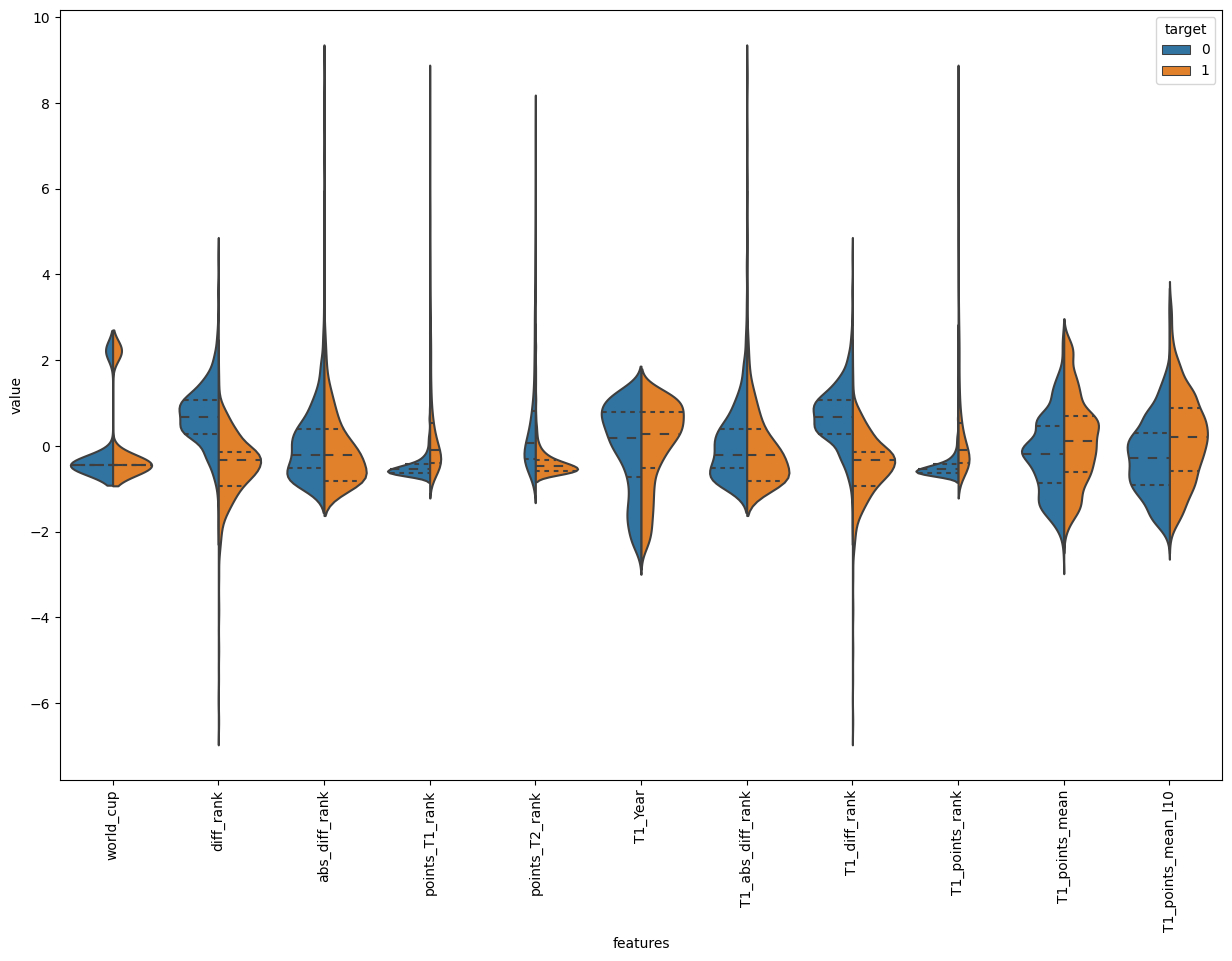

In [541]:
plt.figure(figsize=(15,10))
sns.violinplot(x="features", y="value", hue="target", data=violin1,split=True,inner="quart")
plt.xticks(rotation=90)
plt.show()

On remarque que à priori 'diff_rank', 'T1_year', 'T2_year', 'T2_goals_opp_mean', 'T1_goals_opp_mean','T1_diff_rank', 'T2_diff_rank', 'T1_points_mean', 'T2_points_mean', 'T1_points_mean_l10'

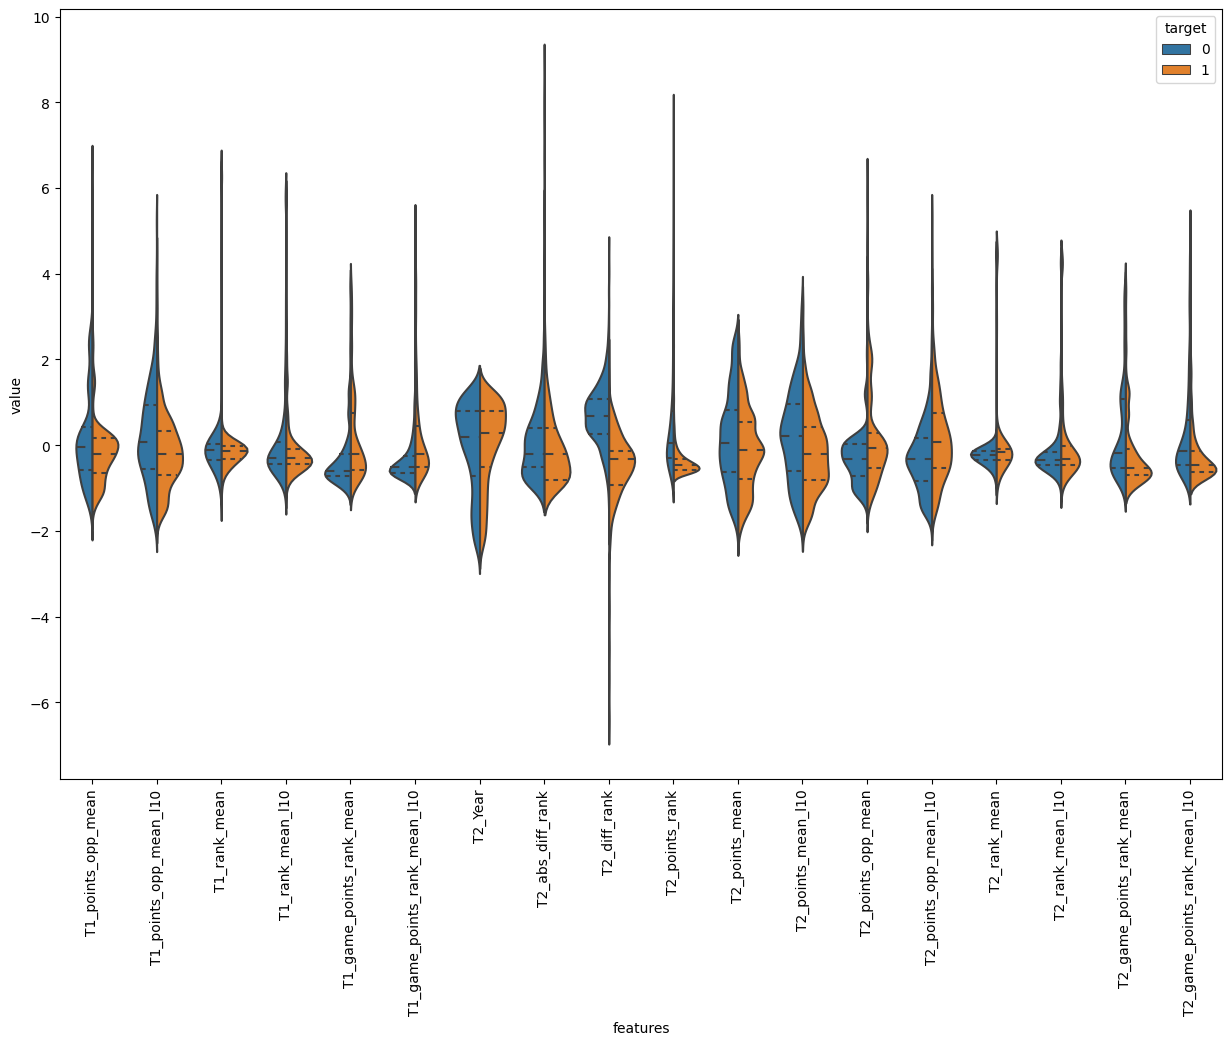

In [542]:
plt.figure(figsize=(15,10))
sns.violinplot(x="features", y="value", hue="target", data=violin2,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

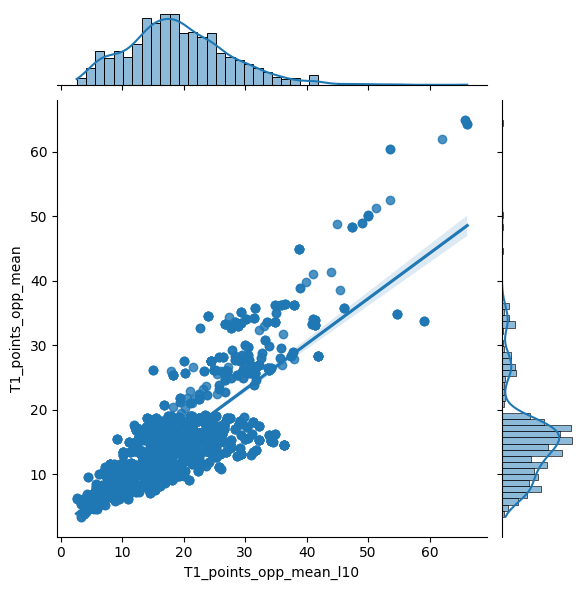

In [543]:
datadifs=df_raw.loc[:,['diff_rank','T1_points_opp_mean','T1_points_opp_mean_l10','T1_Year','T2_points_opp_mean','T2_points_opp_mean_l10','T2_Year']]

sns.jointplot(data = datadifs, x = 'T1_points_opp_mean_l10', y = 'T1_points_opp_mean', kind="reg")
plt.show()

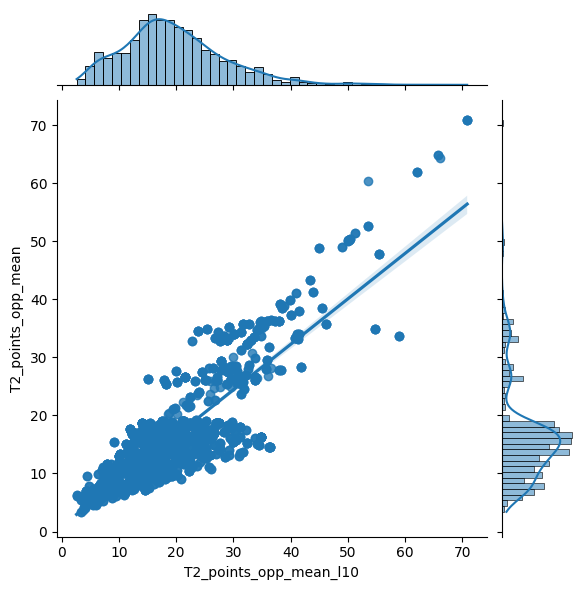

In [544]:

sns.jointplot(data = datadifs, x = 'T2_points_opp_mean_l10', y = 'T2_points_opp_mean', kind="reg")
plt.show()

In [546]:
def create_df(df):
    columns=['Team 1', 'Team 2', 'target', 'world_cup','T1_rank_mean','T2_rank_mean','T1_rank_mean_l10','T2_rank_mean_l10','T1_points_mean','T1_points_mean_l10','T2_points_mean','T2_points_mean_l10','diff_rank','T1_points_opp_mean','T1_points_opp_mean_l10','T2_points_opp_mean','T2_points_opp_mean_l10','T1_game_points_rank_mean','T2_game_points_rank_mean','T1_game_points_rank_mean_l10','T2_game_points_rank_mean_l10']
    base = df.loc[:, columns]

    base.loc[:, "points_dif"] = base["T1_points_mean"] - base["T2_points_mean"]
    base.loc[:, "points_dif_l10"] = base["T1_points_mean_l10"] - base["T2_points_mean"]
    base.loc[:, "points_suf_dif"] = base["T1_points_opp_mean"] - base["T2_points_opp_mean"]
    base.loc[:, "points_suf_dif_l10"] = base["T1_points_opp_mean_l10"] - base["T2_points_opp_mean_l10"]
    base.loc[:, "points_per_ranking_dif"] = (base["T1_points_mean"] / base["T1_rank_mean"]) - (base["T2_points_mean"] / base["T2_rank_mean"])
    base.loc[:,'rank_diff_mean']=base["T1_rank_mean"]-base["T2_rank_mean"]
    base.loc[:,'rank_diff_mean_l10']=base["T1_rank_mean_l10"]-base["T2_rank_mean_l10"]
    base.loc[:, "dif_points_rank"] = base["T1_game_points_rank_mean"] - base["T2_game_points_rank_mean"]
    base.loc[:, "dif_points_rank_l10"] = base["T1_game_points_rank_mean_l10"] - base["T2_game_points_rank_mean_l10"]
    model_df = base[['Team 1', 'Team 2', 'target', 'diff_rank','world_cup','points_dif','points_dif_l10','points_suf_dif','points_suf_dif_l10','points_per_ranking_dif','rank_diff_mean','rank_diff_mean_l10','dif_points_rank','dif_points_rank_l10']]
    return model_df

model_db = create_df(df_raw)

In [547]:
model_db

,Team 1,Team 2,target,diff_rank,world_cup,points_dif,points_dif_l10,points_suf_dif,points_suf_dif_l10,points_per_ranking_dif,rank_diff_mean,rank_diff_mean_l10,dif_points_rank,dif_points_rank_l10
5,Australia,New Zealand,0,5.0,0,-13.500000,-13.500000,13.500000,13.5,1.285714,-5.000000,-5.00,-9.964286,-9.964286
6,Australia,New Zealand,0,5.0,0,-13.500000,-13.500000,13.500000,13.5,1.285714,-5.000000,-5.00,-9.964286,-9.964286
17,Scotland,France,1,1.0,0,-1.150000,-1.150000,9.600000,9.6,-0.095238,-0.650000,-0.65,-0.700000,-0.700000
18,France,England,1,-2.0,0,-4.000000,-4.000000,-4.000000,-4.0,-0.529762,-0.750000,-0.75,-1.850000,-1.850000
19,Scotland,England,1,1.0,0,-5.150000,-5.150000,5.600000,5.6,-0.625000,-1.400000,-1.40,-2.550000,-2.550000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2594,Italy,France,0,10.0,0,-4.620095,-4.739652,17.639373,22.3,-0.715484,0.216202,-2.20,-3.242492,-8.465693
2595,England,Scotland,0,1.0,0,4.180436,6.604950,-3.399853,-0.9,0.622670,-0.091026,-1.00,3.837630,2.130754
2596,Wales,Ireland,0,8.0,0,0.568610,0.663405,1.745008,8.8,0.175148,-0.250249,-0.80,-0.165515,-9.850357
2597,South Africa,Australia,1,-3.0,0,2.468187,4.385428,-1.036756,-9.3,0.263384,0.222913,0.80,2.652839,6.884524


MODEL

In [548]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score


In [549]:
X = model_db.iloc[:, 3:]
y = model_db[["target"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=1)

In [550]:
X

,diff_rank,world_cup,points_dif,points_dif_l10,points_suf_dif,points_suf_dif_l10,points_per_ranking_dif,rank_diff_mean,rank_diff_mean_l10,dif_points_rank,dif_points_rank_l10
5,5.0,0,-13.500000,-13.500000,13.500000,13.5,1.285714,-5.000000,-5.00,-9.964286,-9.964286
6,5.0,0,-13.500000,-13.500000,13.500000,13.5,1.285714,-5.000000,-5.00,-9.964286,-9.964286
17,1.0,0,-1.150000,-1.150000,9.600000,9.6,-0.095238,-0.650000,-0.65,-0.700000,-0.700000
18,-2.0,0,-4.000000,-4.000000,-4.000000,-4.0,-0.529762,-0.750000,-0.75,-1.850000,-1.850000
19,1.0,0,-5.150000,-5.150000,5.600000,5.6,-0.625000,-1.400000,-1.40,-2.550000,-2.550000
...,...,...,...,...,...,...,...,...,...,...,...
2594,10.0,0,-4.620095,-4.739652,17.639373,22.3,-0.715484,0.216202,-2.20,-3.242492,-8.465693
2595,1.0,0,4.180436,6.604950,-3.399853,-0.9,0.622670,-0.091026,-1.00,3.837630,2.130754
2596,8.0,0,0.568610,0.663405,1.745008,8.8,0.175148,-0.250249,-0.80,-0.165515,-9.850357
2597,-3.0,0,2.468187,4.385428,-1.036756,-9.3,0.263384,0.222913,0.80,2.652839,6.884524


In [551]:
gb = GradientBoostingClassifier(random_state=5)

params = {"learning_rate": [0.01, 0.1, 0.5],
            "min_samples_split": [5, 10],
            "min_samples_leaf": [3, 5],
            "max_depth":[3,5,10],
            "max_features":["sqrt"],
            "n_estimators":[100, 200]
         } 

gb_cv = GridSearchCV(gb, params, cv = 3, n_jobs = -1, verbose = False)

gb_cv.fit(X_train.values, np.ravel(y_train))

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=5),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 5, 10], 'max_features': ['sqrt'],
                         'min_samples_leaf': [3, 5],
                         'min_samples_split': [5, 10],
                         'n_estimators': [100, 200]},
             verbose=False)

In [552]:
gb = gb_cv.best_estimator_

gb

GradientBoostingClassifier(max_features='sqrt', min_samples_leaf=3,
                           min_samples_split=10, random_state=5)

In [553]:
params_rf = {"max_depth": [20],
                "min_samples_split": [10],
                "max_leaf_nodes": [175],
                "min_samples_leaf": [5],
                "n_estimators": [250],
                 "max_features": ["sqrt"],
                }

rf = RandomForestClassifier(random_state=1)

rf_cv = GridSearchCV(rf, params_rf, cv = 3, n_jobs = -1, verbose = False)

rf_cv.fit(X_train.values, np.ravel(y_train))

rf = rf_cv.best_estimator_

In [554]:

def analyze(model):
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test.values)[:,1]) #test AUC
    plt.figure(figsize=(15,10))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label="test")

    fpr_train, tpr_train, _ = roc_curve(y_train, model.predict_proba(X_train.values)[:,1]) #train AUC
    plt.plot(fpr_train, tpr_train, label="train")
    auc_test = roc_auc_score(y_test, model.predict_proba(X_test.values)[:,1])
    auc_train = roc_auc_score(y_train, model.predict_proba(X_train.values)[:,1])
    plt.legend()
    plt.title('AUC score is %.2f on test and %.2f on training'%(auc_test, auc_train))
    plt.show()
    
    plt.figure(figsize=(15, 10))
    cm = confusion_matrix(y_test, model.predict(X_test.values))
    sns.heatmap(cm, annot=True, fmt="d")

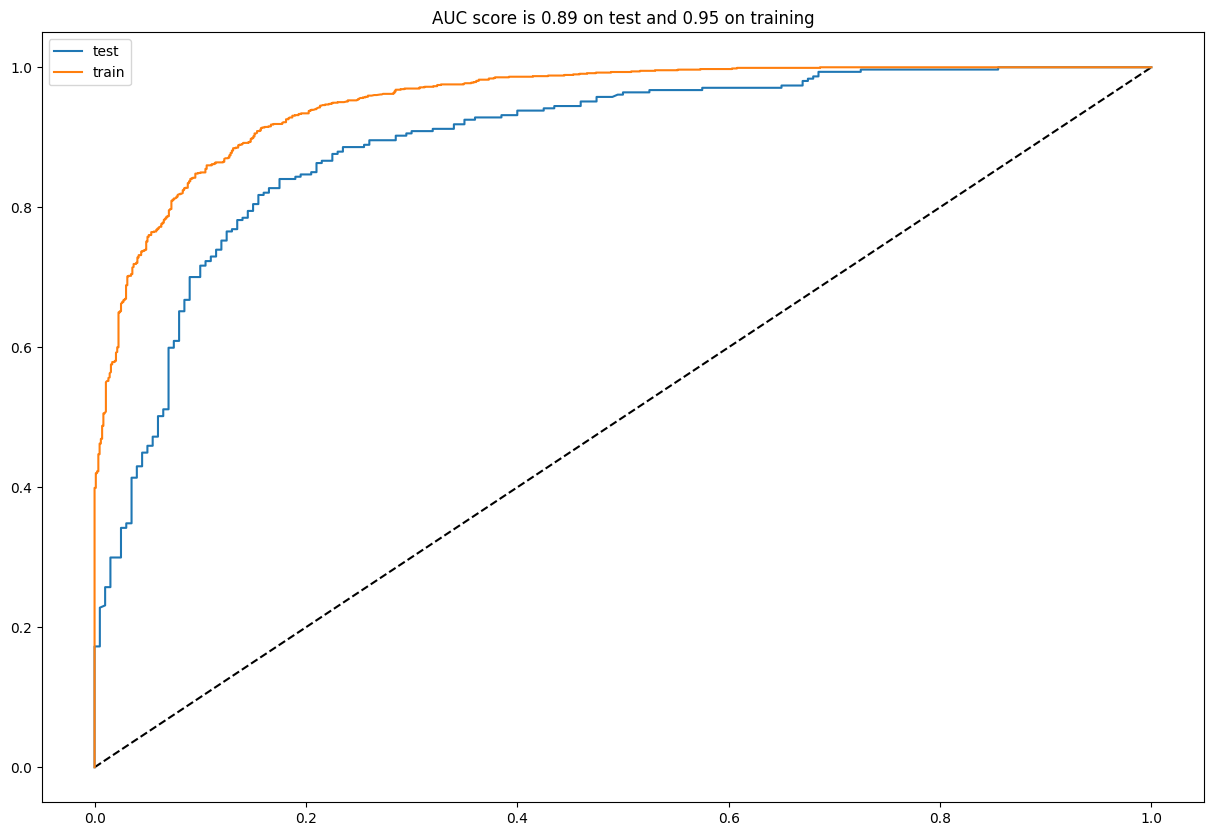

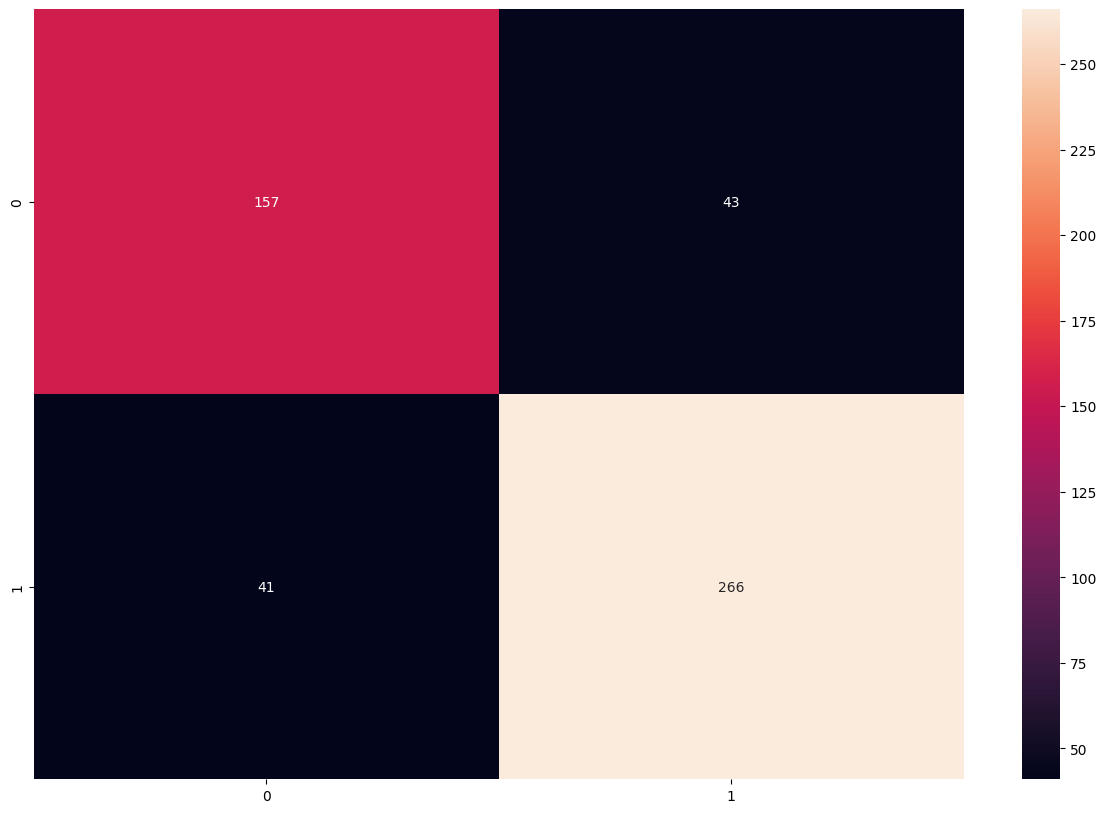

In [555]:
analyze(gb)

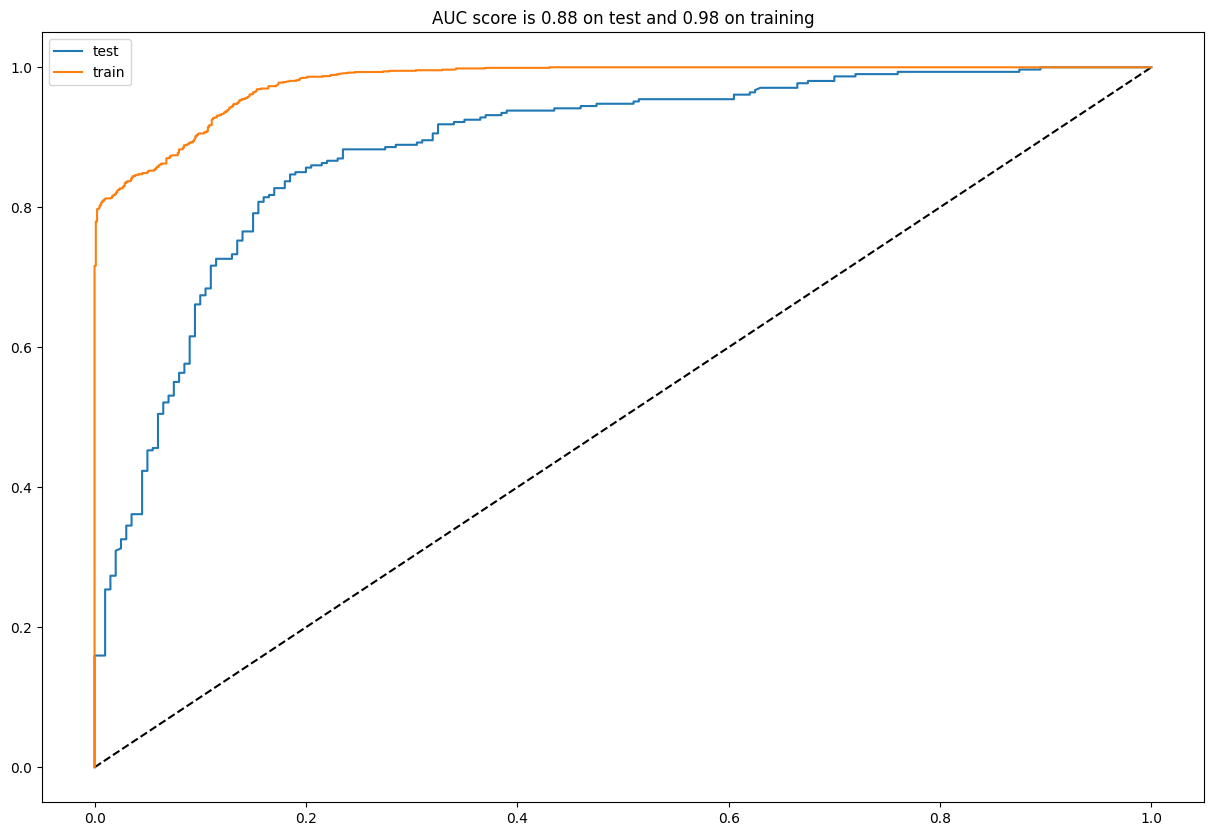

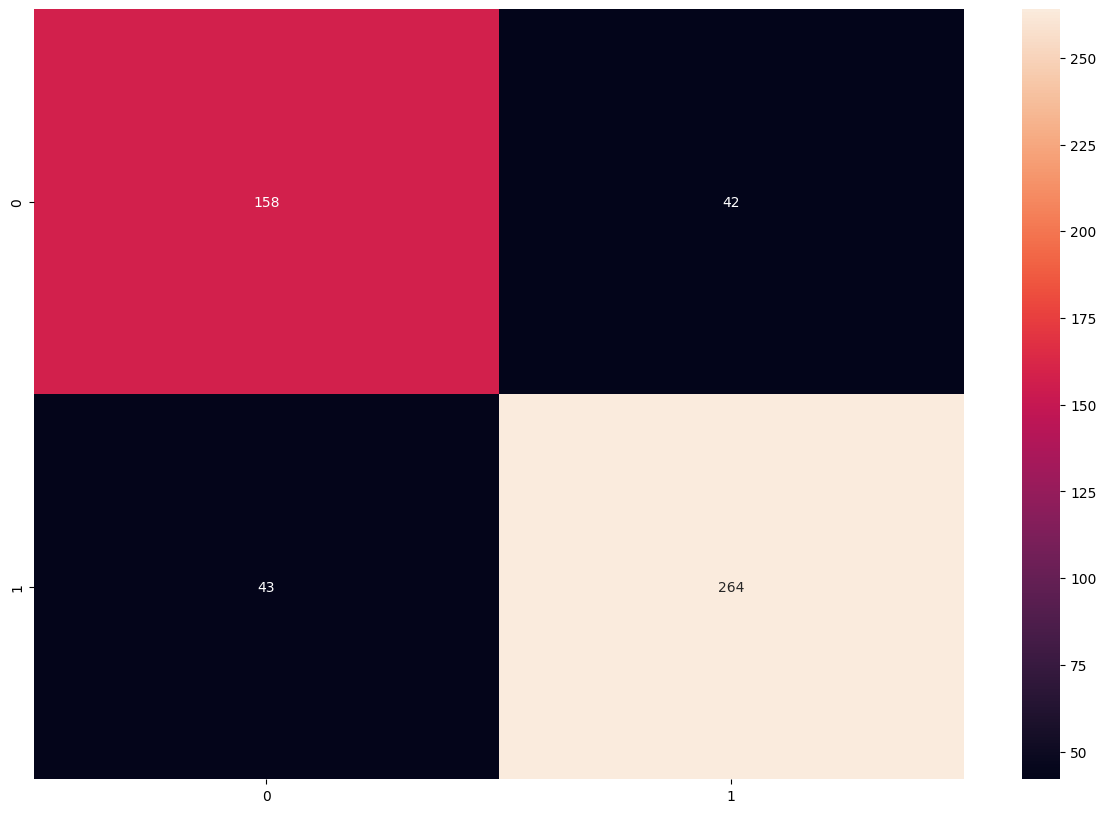

In [556]:
analyze(rf)

In [557]:
df=pd.read_csv('Data/RWC2023.csv')[:40]
planing=df[['Round Number','Home Team','Away Team','Group', 'Result']]
planing=planing.rename(columns={'Home Team':'Team 1','Away Team':'Team 2'})


In [558]:
rank_2023=pd.read_csv('Data/RWC_2023_ranking.csv')
rank_1,rank_2=[],[]
for idx in planing.index:
    rank_1.append(rank_2023[planing['Team 1'][idx]][int(planing['Round Number'][idx])-1])
    rank_2.append(rank_2023[planing['Team 2'][idx]][int(planing['Round Number'][idx])-1])

planing['Team 1 rank']=rank_1
planing['Team 2 rank']=rank_2
planing['diff_rank']=planing['Team 1 rank']-planing['Team 2 rank']
planing


,Round Number,Team 1,Team 2,Group,Result,Team 1 rank,Team 2 rank,diff_rank
0,1,France,New Zealand,Pool A,27 - 13,3,4,-1
1,1,Italy,Namibia,Pool A,52 - 8,13,21,-8
2,1,Ireland,Romania,Pool B,82 - 8,1,19,-18
3,1,Australia,Georgia,Pool C,35 - 15,9,11,-2
4,1,England,Argentina,Pool D,27 - 10,8,6,2
5,1,Japan,Chile,Pool D,42 - 12,14,22,-8
6,1,South Africa,Scotland,Pool B,18 - 3,2,5,-3
7,1,Wales,Fiji,Pool C,32 - 26,10,7,3
8,2,France,Uruguay,Pool A,27 - 12,3,17,-14
9,2,New Zealand,Namibia,Pool A,71 - 3,4,21,-17


Note : No data on Chili so we take the rank of Russia (level is equivalent)

In [559]:
def find_stats(team_1):
    if team_1=='Chile':
        team_1='Russia'
    past_games = team_stats[(team_stats["Team"] == team_1)].sort_values("Year")
    last10 = team_stats[(team_stats["Team"] == team_1)].sort_values("Year").tail(10)

    team_1_goals = past_games['Team Score'].mean()
    team_1_goals_l10 = last10['Team Score'].mean()
    team_1_goals_suf = past_games["Team opp Score"].mean()
    team_1_goals_suf_l10 = last10["Team opp Score"].mean()
    team_1_rank_suf = past_games["Team opp rank"].mean()
    team_1_rank_suf_l10 = last10["Team opp rank"].mean()
    team_1_gp_rank = past_games["points_rank"].mean()
    team_1_gp_rank_l10 = last10["points_rank"].mean()

    return [team_1_goals, team_1_goals_l10, team_1_goals_suf, team_1_goals_suf_l10, team_1_rank_suf, team_1_rank_suf_l10, team_1_gp_rank, team_1_gp_rank_l10]

def find_features(team_1, team_2):
    points_dif = team_1[0] - team_2[0]
    points_dif_l10 = team_1[1] - team_2[1]
    points_opp_dif = team_1[2] - team_2[2]
    points_opp_dif_l10 = team_1[3] - team_2[3]
    points_per_ranking_dif = (team_1[0]/team_1[4]) - (team_2[0]/team_2[4])
    dif_rank_agst = team_1[4] - team_2[4]
    dif_rank_agst_l10 = team_1[5] - team_2[4]
    dif_gp_rank = team_1[6] - team_2[6]
    dif_gp_rank_l10 = team_1[7] - team_2[7]
    
    return [1,points_dif, points_dif_l10, points_opp_dif, points_opp_dif_l10, points_per_ranking_dif, dif_rank_agst, dif_rank_agst_l10, dif_gp_rank, dif_gp_rank_l10]

In [562]:
team_1 = find_stats(planing.iloc[0]['Team 1'])
team_2 = find_stats(planing.iloc[0]['Team 2'])

features_g1 = [planing.iloc[0]['diff_rank']]+find_features(team_1, team_2)
features_g2 = [-1*planing.iloc[0]['diff_rank']]+find_features(team_2, team_1)


[19.513260530421217, 33.3, 16.527301092043682, 22.3, 7.060842433697348, 7.3, 4.6851410246886065, 14.006666666666666]
[28.900562851782365, 31.9, 14.540337711069418, 18.7, 6.50093808630394, 5.7, 21.68152863396766, 11.093333333333334]


In [563]:
probs_g1 = rf.predict_proba([features_g1])
probs_g2 = rf.predict_proba([features_g2])


team_1_prob_g1 = probs_g1[0][0]
team_1_prob_g2 = probs_g2[0][1]
team_2_prob_g1 = probs_g1[0][1]
team_2_prob_g2 = probs_g2[0][0]
team_1_prob = (probs_g1[0][0] + probs_g2[0][1])/2
team_2_prob = (probs_g2[0][0] + probs_g1[0][1])/2



In [564]:
X.head()

,diff_rank,world_cup,points_dif,points_dif_l10,points_suf_dif,points_suf_dif_l10,points_per_ranking_dif,rank_diff_mean,rank_diff_mean_l10,dif_points_rank,dif_points_rank_l10
5,5.0,0,-13.50,-13.50,13.5,13.5,1.285714,-5.00,-5.00,-9.964286,-9.964286
6,5.0,0,-13.50,-13.50,13.5,13.5,1.285714,-5.00,-5.00,-9.964286,-9.964286
17,1.0,0,-1.15,-1.15,9.6,9.6,-0.095238,-0.65,-0.65,-0.700000,-0.700000
18,-2.0,0,-4.00,-4.00,-4.0,-4.0,-0.529762,-0.75,-0.75,-1.850000,-1.850000
19,1.0,0,-5.15,-5.15,5.6,5.6,-0.625000,-1.40,-1.40,-2.550000,-2.550000


In [572]:
winner=[]
t1_score=[]
t2_score=[]
for idx in planing.index:
    s=planing['Result'][idx].split(' - ')
    t1_score.append(int(s[0]))
    t2_score.append(int(s[1]))
    if int(s[0])>int(s[1]):
        winner.append(planing['Team 1'][idx])
    elif int(s[0])<int(s[1]):
        winner.append(planing['Team 2'][idx])
    else:
        winner.append('draw')


planing['Winner']=winner
planing['Team 1 score']=t1_score
planing['Team 2 score']=t2_score

In [574]:
win_team_1=[]
win_team_2=[]
round=1

for i in planing.index:
    t_1 = find_stats(planing.iloc[i]['Team 1'])
    t_2 = find_stats(planing.iloc[i]['Team 2'])

    features_g1 = [planing.iloc[i]['diff_rank']]+find_features(t_1, t_2)
    features_g2 = [-1*planing.iloc[i]['diff_rank']]+find_features(t_2, t_1)
    probs_g1 = rf.predict_proba([features_g1])
    probs_g2 = rf.predict_proba([features_g2])
    team1=planing.iloc[0]['Team 1']
    team2=planing.iloc[0]['Team 2']

    team_1_prob_g1 = probs_g1[0][0]
    team_1_prob_g2 = probs_g2[0][1]
    team_2_prob_g1 = probs_g1[0][1]
    team_2_prob_g2 = probs_g2[0][0]
    team_1_prob = (probs_g1[0][0] + probs_g2[0][1])/2
    team_2_prob = (probs_g2[0][0] + probs_g1[0][1])/2

    win_team_1.append(team_1_prob)
    win_team_2.append(team_2_prob)
    

planing['proba_team_1']=1-np.array(win_team_1)
planing['proba_team_2']=1-np.array(win_team_2)

planing['predict winner']=[planing['Team 1'][i] if planing['proba_team_1'][i]>planing['proba_team_2'][i] else planing['Team 2'][i] for i in planing.index]


In [580]:
def points_finder(score1,score2):
    score1=int(score1)
    score2=int(score2)
    if score1>score2:
        if score2+20<=score1:
            return (5,0)
        elif score1-7<=score2:
            return (4,1)
        else:
            return (4,0)
    elif score2>score1:
        if score1+20<=score2:
            return (0,5)
        elif score2-7<=score1:
            return (1,4)
        else:
            return (0,4)
    else:
        return (2,2)
        
ls_pts1=[]
ls_pts2=[]
for i in planing.index:
    a,b=points_finder(planing['Team 1 score'][i],planing['Team 2 score'][i])
    ls_pts1.append(a)
    ls_pts2.append(b)

planing['Team 1 points']=ls_pts1
planing['Team 2 points']=ls_pts2

In [582]:
planing

,Round Number,Team 1,Team 2,Group,Result,Team 1 rank,Team 2 rank,diff_rank,Winner,proba_team_1,proba_team_2,predict winner,Team 1 score,Team 2 score,Team 1 points,Team 2 points
0,1,France,New Zealand,Pool A,27 - 13,3,4,-1,France,0.598663,0.401337,France,27,13,4,0
1,1,Italy,Namibia,Pool A,52 - 8,13,21,-8,Italy,0.891142,0.108858,Italy,52,8,5,0
2,1,Ireland,Romania,Pool B,82 - 8,1,19,-18,Ireland,0.953487,0.046513,Ireland,82,8,5,0
3,1,Australia,Georgia,Pool C,35 - 15,9,11,-2,Australia,0.764796,0.235204,Australia,35,15,5,0
4,1,England,Argentina,Pool D,27 - 10,8,6,2,England,0.311442,0.688558,Argentina,27,10,4,0
5,1,Japan,Chile,Pool D,42 - 12,14,22,-8,Japan,0.833675,0.166325,Japan,42,12,5,0
6,1,South Africa,Scotland,Pool B,18 - 3,2,5,-3,South Africa,0.702480,0.297520,South Africa,18,3,4,0
7,1,Wales,Fiji,Pool C,32 - 26,10,7,3,Wales,0.378492,0.621508,Fiji,32,26,4,1
8,2,France,Uruguay,Pool A,27 - 12,3,17,-14,France,0.935000,0.065000,France,27,12,4,0
9,2,New Zealand,Namibia,Pool A,71 - 3,4,21,-17,New Zealand,0.922335,0.077665,New Zealand,71,3,5,0


In [588]:
pools={}
for i in planing.index:
    if planing['Group'][i] not in pools.keys():
        pools[planing['Group'][i]]={}
    if planing['Team 1'][i] not in pools[planing['Group'][i]].keys():
        pools[planing['Group'][i]][planing['Team 1'][i]]=0
    if planing['Team 2'][i] not in pools[planing['Group'][i]].keys():
        pools[planing['Group'][i]][planing['Team 2'][i]]=0
    pools[planing['Group'][i]][planing['Team 1'][i]]+=planing['Team 1 points'][i]
    pools[planing['Group'][i]][planing['Team 2'][i]]+=planing['Team 2 points'][i]

pools

{'Pool A': {'France': 18,
  'New Zealand': 15,
  'Italy': 10,
  'Namibia': 0,
  'Uruguay': 4},
 'Pool B': {'Ireland': 19,
  'Romania': 0,
  'South Africa': 15,
  'Scotland': 10,
  'Tonga': 5},
 'Pool C': {'Australia': 11,
  'Georgia': 3,
  'Wales': 19,
  'Fiji': 10,
  'Portugal': 6},
 'Pool D': {'England': 18,
  'Argentina': 13,
  'Japan': 9,
  'Chile': 0,
  'Samoa': 7}}

In [603]:
QF=pd.DataFrame({"Round Number":['QF','QF','QF','QF'],"Team 1":["Wales","Ireland","England","France"],"Team 2":["Argentina","New Zealand","Australia","South Africa"],"Group":[None,None,None,None],"Result":[None,None,None,None]})

In [604]:
rank_1,rank_2=[],[]
for idx in QF.index:
    rank_1.append(rank_2023[QF['Team 1'][idx]][len(rank_2023)-1])
    rank_2.append(rank_2023[QF['Team 2'][idx]][len(rank_2023)-1])

QF['Team 1 rank']=rank_1
QF['Team 2 rank']=rank_2
QF['diff_rank']=QF['Team 1 rank']-QF['Team 2 rank']
QF

,Round Number,Team 1,Team 2,Group,Result,Team 1 rank,Team 2 rank,diff_rank
0,QF,Wales,Argentina,None,None,7,8,-1
1,QF,Ireland,New Zealand,None,None,1,4,-3
2,QF,England,Australia,None,None,6,9,-3
3,QF,France,South Africa,None,None,2,3,-1


In [605]:
win_team_1=[]
win_team_2=[]

for i in QF.index:
    t_1 = find_stats(QF.iloc[i]['Team 1'])
    t_2 = find_stats(QF.iloc[i]['Team 2'])

    features_g1 = [QF.iloc[i]['diff_rank']]+find_features(t_1, t_2)
    features_g2 = [-1*QF.iloc[i]['diff_rank']]+find_features(t_2, t_1)
    probs_g1 = rf.predict_proba([features_g1])
    probs_g2 = rf.predict_proba([features_g2])
    team1=QF.iloc[0]['Team 1']
    team2=QF.iloc[0]['Team 2']

    team_1_prob_g1 = probs_g1[0][0]
    team_1_prob_g2 = probs_g2[0][1]
    team_2_prob_g1 = probs_g1[0][1]
    team_2_prob_g2 = probs_g2[0][0]
    team_1_prob = (probs_g1[0][0] + probs_g2[0][1])/2
    team_2_prob = (probs_g2[0][0] + probs_g1[0][1])/2

    win_team_1.append(team_1_prob)
    win_team_2.append(team_2_prob)
    

QF['proba_team_1']=1-np.array(win_team_1)
QF['proba_team_2']=1-np.array(win_team_2)

QF['predict winner']=[QF['Team 1'][i] if QF['proba_team_1'][i]>QF['proba_team_2'][i] else QF['Team 2'][i] for i in QF.index]
QF

,Round Number,Team 1,Team 2,Group,Result,Team 1 rank,Team 2 rank,diff_rank,proba_team_1,proba_team_2,predict winner
0,QF,Wales,Argentina,None,None,7,8,-1,0.727748,0.272252,Wales
1,QF,Ireland,New Zealand,None,None,1,4,-3,0.651450,0.348550,Ireland
2,QF,England,Australia,None,None,6,9,-3,0.787512,0.212488,England
3,QF,France,South Africa,None,None,2,3,-1,0.614850,0.385150,France


In [606]:
SF=pd.DataFrame({"Round Number":['SF','SF'],"Team 1":["Wales","England"],"Team 2":["Ireland","France"],"Group":[None,None],"Result":[None,None]})

In [607]:
rank_1,rank_2=[],[]
for idx in SF.index:
    rank_1.append(rank_2023[SF['Team 1'][idx]][len(rank_2023)-1])
    rank_2.append(rank_2023[SF['Team 2'][idx]][len(rank_2023)-1])

SF['Team 1 rank']=rank_1
SF['Team 2 rank']=rank_2
SF['diff_rank']=SF['Team 1 rank']-SF['Team 2 rank']

win_team_1=[]
win_team_2=[]

for i in SF.index:
    t_1 = find_stats(SF.iloc[i]['Team 1'])
    t_2 = find_stats(SF.iloc[i]['Team 2'])

    features_g1 = [SF.iloc[i]['diff_rank']]+find_features(t_1, t_2)
    features_g2 = [-1*SF.iloc[i]['diff_rank']]+find_features(t_2, t_1)
    probs_g1 = rf.predict_proba([features_g1])
    probs_g2 = rf.predict_proba([features_g2])
    team1=SF.iloc[0]['Team 1']
    team2=SF.iloc[0]['Team 2']

    team_1_prob_g1 = probs_g1[0][0]
    team_1_prob_g2 = probs_g2[0][1]
    team_2_prob_g1 = probs_g1[0][1]
    team_2_prob_g2 = probs_g2[0][0]
    team_1_prob = (probs_g1[0][0] + probs_g2[0][1])/2
    team_2_prob = (probs_g2[0][0] + probs_g1[0][1])/2

    win_team_1.append(team_1_prob)
    win_team_2.append(team_2_prob)
    

SF['proba_team_1']=1-np.array(win_team_1)
SF['proba_team_2']=1-np.array(win_team_2)

SF['predict winner']=[SF['Team 1'][i] if SF['proba_team_1'][i]>SF['proba_team_2'][i] else SF['Team 2'][i] for i in SF.index]
SF

,Round Number,Team 1,Team 2,Group,Result,Team 1 rank,Team 2 rank,diff_rank,proba_team_1,proba_team_2,predict winner
0,SF,Wales,Ireland,None,None,7,1,6,0.163077,0.836923,Ireland
1,SF,England,France,None,None,6,2,4,0.287882,0.712118,France


In [608]:
Final=pd.DataFrame({"Round Number":['Final'],"Team 1":["France"],"Team 2":["Ireland"],"Group":[None],"Result":[None]})

In [609]:
rank_1,rank_2=[],[]
for idx in Final.index:
    rank_1.append(rank_2023[Final['Team 1'][idx]][len(rank_2023)-1])
    rank_2.append(rank_2023[Final['Team 2'][idx]][len(rank_2023)-1])

Final['Team 1 rank']=rank_1
Final['Team 2 rank']=rank_2
Final['diff_rank']=Final['Team 1 rank']-Final['Team 2 rank']

win_team_1=[]
win_team_2=[]

for i in Final.index:
    t_1 = find_stats(Final.iloc[i]['Team 1'])
    t_2 = find_stats(Final.iloc[i]['Team 2'])

    features_g1 = [Final.iloc[i]['diff_rank']]+find_features(t_1, t_2)
    features_g2 = [-1*Final.iloc[i]['diff_rank']]+find_features(t_2, t_1)
    probs_g1 = rf.predict_proba([features_g1])
    probs_g2 = rf.predict_proba([features_g2])
    team1=Final.iloc[0]['Team 1']
    team2=Final.iloc[0]['Team 2']

    team_1_prob_g1 = probs_g1[0][0]
    team_1_prob_g2 = probs_g2[0][1]
    team_2_prob_g1 = probs_g1[0][1]
    team_2_prob_g2 = probs_g2[0][0]
    team_1_prob = (probs_g1[0][0] + probs_g2[0][1])/2
    team_2_prob = (probs_g2[0][0] + probs_g1[0][1])/2

    win_team_1.append(team_1_prob)
    win_team_2.append(team_2_prob)
    

Final['proba_team_1']=1-np.array(win_team_1)
Final['proba_team_2']=1-np.array(win_team_2)

Final['predict winner']=[Final['Team 1'][i] if Final['proba_team_1'][i]>Final['proba_team_2'][i] else Final['Team 2'][i] for i in Final.index]
Final

,Round Number,Team 1,Team 2,Group,Result,Team 1 rank,Team 2 rank,diff_rank,proba_team_1,proba_team_2,predict winner
0,Final,France,Ireland,None,None,2,1,1,0.424156,0.575844,Ireland


In conclusion, the winner of the RWC 2023 should be Ireland 